# Homework 2

The homework consists of two parts: theoretical part (5 pts) and coding part (25 pts).
 - All theoretical questions must be answered in your own words, do not copy-paste text from the internet. Points can be deducted for terrible formatting or incomprehensible English.
 - Code must be commented. If you use code you found online, you have to add the link to the source you used. There is no penalty for using outside sources as long as you convince us you understand the code.

*Once completed zip the entire directory containing this exercise and upload it to https://courses.cs.ut.ee/2020/nn/spring/Main/Practices.*


For background reading see http://cs231n.github.io/linear-classify/ and http://cs231n.github.io/optimization-1/.

If you did this homework together with course mates, please write here their names (answers still have to be your own!).

**Name(s):** Vladyslav Umerenko

## Part 1: Lecture Materials (5 pts)

These theoretical questions are about the material covered in the lecture about "Feed-forward Neural networks"

### Feed-forward Neural Networks

**Task 1.1: Logic gates (1pt)**
In the lecture you have seen how to construct `AND`, `OR` and `NOT` logic gates using the McCulloch-Pitts model of a neuron. Remember that:
```
 if sum(w.*x)<0, output is 0
 if sum(w.*x)>=0, output is 1 (notice that 0 is included)
```
 Your task is to construct one more logical operation using MP neurons - the `NAND` gate. Your response should contain an image (that you should draw yourself and not copy paste from the internet) similar to the images below:

<img src="./gates.png" width="250">

**Your Answer**:
The truth table of NAND is the following:

| X   | Y  | X NAND B |
|-----|----|----------|
| 0   | 0  | 1        |
| 0   | 1  | 1        |
| 1   | 0  | 1        |
| 1   | 1  | 0        |

Including that the sum of features and weights product should be $>0$ for a positive output, we solve a system of linear inequalities in order to find the range of valid perceptron parameter values.

$ 0\cdot w_1 + 0\cdot w_2 + w_0 \geq 0 $\
$ 0\cdot w_1 + 1\cdot w_2 + w_0 \geq 0 $\
$ 1\cdot w_1 + 0\cdot w_2 + w_0 \geq 0 $\
$ 1\cdot w_1 + 1\cdot w_2 + w_0 \lt 0 $

, where $w_0$ -- bias

This system solves to this set of inequalities,

$ w_0 \gt 0 $\
$ w_1 \geq -w_0 $\
$ w_2 \geq -w_0 $\
$ w_1 + w_2 \lt -w_0$

which enable us to define valid weights of

$ w_0 = 1 $\
$ w_1 = -1 $\
$ w_2 = -1 $

Let's compute NAND using this weights.

$ -1\cdot 0 + -1\cdot 0 + 1 = 1 \quad (\geq 0)$\
$ -1\cdot 0 + -1\cdot 1 + 1 = 0 \quad (\geq 0)$\
$ -1\cdot 1 + -1\cdot 0 + 1 = 0 \quad (\geq 0) $\
$ -1\cdot 1 + -1\cdot 1 + 1 = -1 \quad (\lt 0)$

The solution is compatible with NAND truth table.

**Task 1.2: Perceptron (2pts)**
In the lecture you learned about the perceptron algorithm that dates back to the 1950-60ies. Using a perceptron would it be possible to learn a model that perfectly separates the two classes in each of the following two datasets:

**Dataset A:**

| Height | Weights | Label |
|--------|---------|-------|
| 25cm   | 5kg     | dog   |
| 22cm   | 3kg     | dog   |
| 24cm   | 3kg     | cat   |
| 23cm   | 5kg     | cat   |

**Dataset B:**

| Height | Weights | Label |
|--------|---------|-------|
| 25cm   | 5kg     | dog   |
| 24cm   | 6kg     | dog   |
| 23cm   | 4kg     | cat   |
| 24cm   | 5kg     | cat   |

For each dataset your response should state if perceptron can learn to separate the classes and if not, why. Feel free to add illustrations.

**Your Answer**: It wouldn't be possible to separate the two classes with perceptron in case of dataset A, because the classes aren't linearly separable. The situation is opposite for dataset B, separation line can easily be put between the two classes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dogs_a = np.array([[25, 5],
                   [22, 3]]).T
cats_a = np.array([[24, 3],
                   [23, 5]]).T

dogs_b = np.array([[25, 5],
                   [24, 6]]).T
cats_b = np.array([[23, 4],
                   [24, 5]]).T

_, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].plot(dogs_a[0], dogs_a[1], 'ro')
ax[0].plot(cats_a[0], cats_a[1], 'bo')
ax[0].set_title('Dataset A')

ax[1].plot(dogs_b[0], dogs_b[1], 'ro')
ax[1].plot(cats_b[0], cats_b[1], 'bo')
ax[1].set_title('Dataset A')

plt.show()

<Figure size 800x400 with 2 Axes>

**Task 1.3: Feed-forward neural network (2pts)**
Consider two fully-connected feed-forward neural networks that take as input 32x32 images with 3 color values per pixel. This input is flattened before being fed to the network (put into one long 1D vector). The networks' output consists of 10 probabilities corresponding to different object classes (thus performing object recognition). 

Network A has one hidden layer of size 1024. Network B has three hidden layers of size 512. 

Answer the following questions:
 - What is the length of the input vector?
 - What are the dimensions of the weight matrices of these networks? (you need to give 2 matrices for network A and 4 for network B) 
 - Which network has more parameters? Explain.

**Your Answer**:

1. $32*32*3=3072$
2. Network A: `(3072, 1024), (1024, 10)`\
   Network B: `(3072, 512), (512, 512), (512, 512), (512, 10)`
3. Network A, because it has more units in hidden layer than network B

In [2]:
('Network A', 3072*1024 + 1024*10), ('Network B', 3072*512 + 512*512*2 + 512*10)

(('Network A', 3155968), ('Network B', 2102272))

## Part 2: Softmax exercise (25 pts)

In this exercise you will:

- implement a fully-vectorized **loss function** for the Softmax classifier
- implement the fully-vectorized expression for its **analytic gradient**
- **check your implementation** with numerical gradient
- **optimize** the loss function with **SGD**
- use a validation set to **tune the learning rate and regularization** strength
- **visualize** the final learned weights

### Theory

We have a linear classifier (you could also call it 1-layer neural network). Input to the network is a vector $\mathbf{x}$ of $D$ features, output of the network is vector of $C$ class probablities $\mathbf{p}$. The target class $c$ is coded as one-hot vector $\mathbf{y}$ (meaning it has 1 at index $c$ and zeroes everywhere else). Weights of the network are represented by $N \times C$ matrix $\mathbf{W}$.

$$
\mathbf{x} = \begin{pmatrix} x_1 & x_2 & ..& x_D \end{pmatrix}
\qquad
\mathbf{p} = \begin{pmatrix} p_1\\ p_2\\ ..\\ p_C \end{pmatrix}
\qquad
\mathbf{y} = \begin{pmatrix} y_1\\ y_2\\ ..\\ y_C \end{pmatrix}
\qquad y_i = 
\begin{cases}
    1, &\textrm{if}\ \ i=c\\
    0, &otherwise
\end{cases}
\qquad
\mathbf{W} = \begin{pmatrix} w_{11}&w_{12}&..&w_{1C}\\w_{21}&w_{22}&..&w_{2C}\\..&..&..&..\\w_{D1}&w_{D2}&..&w_{DC} \end{pmatrix}
$$

Notice we are missing **biases**, but without a loss of generalization we can add another feature to the inputs which is always $1$ and this turns weights of this feature into biases. 

To train the network we use cross-entropy loss function and perform gradient descent with respect to weight matrix $\mathbf{W}$. Following represents step-by-step forward pass of the network, where $L$ is the loss function:


\begin{align*}
z_j = \sum_{i=1}^D x_i W_{ij},\qquad\qquad \textrm{which can be achieved via} \qquad\qquad \mathbf{z} &= \mathbf{x}W, 
\\
\qquad p_i = \frac{e^{z_i}}{\sum_{j=1}^C e^{z_j}},\qquad\qquad\qquad \textrm{  or in short} \qquad\qquad\qquad\qquad \mathbf{p} &= softmax(\mathbf{z}),
\end{align*}

\begin{align*}
L &= -\sum_{i=1}^C y_i \log p_i = -\log p_c \qquad\qquad\qquad \textrm{ (only c-th element matters)}
\end{align*}


To perform gradient descent we need the gradient of loss function with respect to the weights $\frac{\partial L}{\partial W_{ij}}$. This can be expressed with chain rule:

$$
%\frac{\partial L}{\partial \mathbf{W}} = \frac{\partial L}{\partial \mathbf{p}} \cdot \frac{\partial \mathbf{p}}{\partial \mathbf{z}} \cdot \frac{\partial \mathbf{z}}{\partial \mathbf{W}}
%\\
\frac{\partial L}{\partial W_{ij}} = \sum_{k=1}^{C} \sum_{l=1}^{C} \frac{\partial L}{\partial p_l} \frac{\partial p_l}{\partial z_k} \frac{\partial z_k}{\partial W_{ij}}
$$

Sum over $l$ and $k$ comes from the fact that $W_{ij}$ affects loss $L$ through multiple pathways through different $p_l$ and $z_k$.  
It is best imagined as a [computational graph](http://colah.github.io/posts/2015-08-Backprop/).

To compute the full gradient we need to produce three partial derivatives:

$$
\frac{\partial L}{\partial p_l} = \frac{\partial (-\sum_{i=1}^Cy_i\log p_i)}{\partial p_i} = -\frac{y_i}{p_i}
\\
\frac{\partial p_l}{\partial z_k} = \frac{\partial}{\partial z_k}\frac{e^{z_l}}{\sum\limits_{j=1}^C e^z_j} = [ \, \sum=\sum\limits_{j=1}^C e^z_j ] \, = \frac{e^{z_l}\sum-e^{z_k}e^{z_l}}{\sum^2}+\frac{0\cdot\sum-e^{z_k}e^{z_l}}{\sum^2} = \frac{e^{z_l}(\sum-e^{z_k})}{\sum^2}-\frac{e^{z_k}}{\sum}\frac{e^{z_l}}{\sum} = \frac{e^{z_l}}{\sum}\frac{\sum(1-\frac{e^{z_k}}{\sum})}{\sum}-p_kp_l=p_k(1-p_k)-p_kp_l
\\
\frac{\partial z_k}{\partial W_{ij}} = \frac{\partial (\sum\limits_{i=1}^D x_iW_{ij})}{\partial W_{ij}} = x_i
$$

**Task 2.1 (5pts):** 
Derive the above gradients and fill the empty space above. You need to remember some classical calculus rules:
$$
(e^x)' = e^x
\qquad
(\log x)' = \frac{1}{x}
\qquad
(xy)' = x'y + x'y
\qquad
\left(\frac{x}{y}\right)' = \frac{x'y - y'x}{y^2}
$$



&nbsp; 

&nbsp; 

For you to be able to complete the coding tasks, we give you the correct final formulas, obtained when putting the above three partial derivatives together:

$$
\begin{align*}
\frac{\partial L}{\partial z_k} &= \sum_{l=1}^C \frac{\partial L}{\partial p_l} \frac{\partial p_l}{\partial z_k}= -\frac{y_k}{p_k} p_k (1-p_k) + \sum_{l\neq k}^C \frac{y_l}{p_l} p_l p_k = -y_k + y_k p_k + \sum_{l\neq k}^C y_l p_k  = -y_k + p_k \sum_{l=1}^C y_l= p_k-y_k
\\
\frac{\partial L}{\partial W_{ij}} &= \sum_{k=1}^C \frac{\partial L}{\partial z_k} \frac{\partial z_k}{\partial W_{ij}} = (p_j - y_j) x_i
\end{align*}
$$

This computes the gradient value in one data point. However, for increased stability, it is beneficial to learn from average gradient over multiple points. The collection of N samples is called a **minibatch**. We note the loss in k-th data point by $L_k$ and the average loss with $\textbf{L}$.

\begin{align*}
\textbf{L}=\frac{1}{N}\sum_{k=1}^N L_k 
\end{align*}

\begin{align*}
\frac{\partial \textbf{L}}{\partial W_{ij}} &= \frac{1}{N} \sum_{l=1}^N \frac{\partial L_k}{\partial W_{ij}}
\end{align*}


It is convenient to work with average loss and average gradients, not the sum, because then the magnitude of the value does not depend on batch-size N.

----

To perform a gradient descent you need to subtract gradient from the weights (because we are minimizing the loss function):
$$
W_{ij}^{t+1} = W_{ij}^t - \alpha \frac{\partial \textbf{L}}{\partial W_{ij}}
$$


Here $\alpha$ is a learning rate that must be tuned manually.

Using the learning rule and the formulas for calculating gradients for each element of W, you should be able to complete the first coding task below (marked with task 2.2). 

In [3]:
from __future__ import print_function

import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## CIFAR-10 Data Loading and Preprocessing

In [4]:
# Load the raw CIFAR-10 data.
cifar10_dir = '../datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


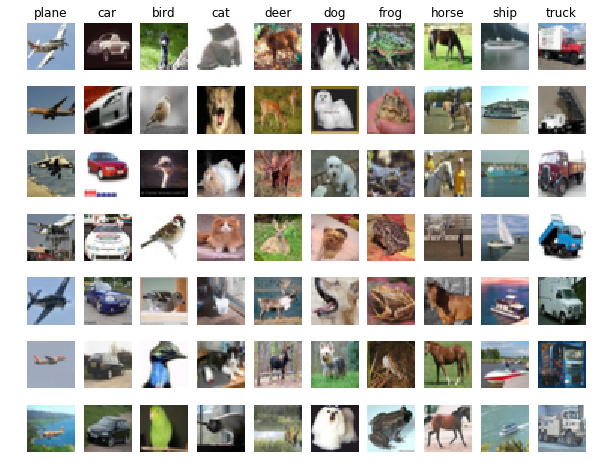

In [5]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [6]:
# Split the data into train, val, and test sets. In addition we will
# create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of
# the training set.
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [7]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


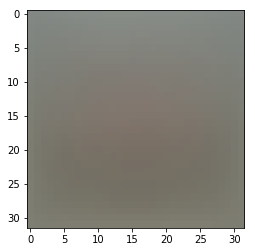

In [8]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) # visualize the mean image
plt.show()

In [9]:
# second: subtract the mean image from train and test data
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

In [10]:
# third: append the bias dimension of ones (i.e. bias trick) so that our model
# only has to worry about optimizing a single weight matrix W.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


## Softmax Classifier

Your code for this section will all be written inside `softmax.py`.

**Task 2.2 (2pts):** First implement the naive softmax loss function with nested loops. Open the file `softmax.py` and implement the `softmax_loss_naive` function.


In [11]:
#TODO: implement code in softmax.py
from softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.368556
sanity check: 2.302585


**Task 2.3 (1pt):** Why do we expect our loss to be close to $-\log(0.1)$? Explain briefly.

**Your answer:** As there are 10 classes and the dataset is balanced, so the probability of observing one of the classes is 1/10. Thus initially our loss function should output cross entropy of 0.1 probability as it is the same as to predict a class randomly from uniform distribution.

In [12]:
#TODO: implement code in softmax.py
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# Use numeric gradient checking as a debugging tool.
# The numeric gradient should be close to the analytic gradient
# (relative error should be in the magnitude of 1e-8).
print("Without regularization:")
from gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

# Do another gradient check with regularization.
print("With regularization:")
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

# Hint: the gardients your code finds and the gradients computed numerically should more-or-less agree
# you can expect on average 10^-8 error. A 10^-6 might also happen. Anything bigger is suspicious.

Without regularization:
numerical: 0.434139 analytic: 0.434139, relative error: 5.712582e-08
numerical: -1.793104 analytic: -1.793104, relative error: 3.987334e-08
numerical: -0.042936 analytic: -0.042936, relative error: 3.127027e-07
numerical: 0.443184 analytic: 0.443184, relative error: 3.334595e-08
numerical: 2.275329 analytic: 2.275329, relative error: 2.797127e-08
numerical: -1.638320 analytic: -1.638320, relative error: 8.365221e-09
numerical: 0.325006 analytic: 0.325006, relative error: 1.342200e-08
numerical: -3.838478 analytic: -3.838478, relative error: 1.134195e-08
numerical: -1.336093 analytic: -1.336093, relative error: 2.264186e-08
numerical: 0.330098 analytic: 0.330098, relative error: 2.058124e-07
With regularization:
numerical: 2.459163 analytic: 2.459163, relative error: 1.002345e-08
numerical: -2.474946 analytic: -2.474946, relative error: 6.208767e-09
numerical: -0.895173 analytic: -0.895173, relative error: 2.403673e-08
numerical: 0.429689 analytic: 0.429689, rela

## Vectorization of the network and learning

By now you have (hopefully) implemented how to do the froward pass and apply the gradient calculation element by element to the parameters in the weight matrix. However, this code performed the gradient comutation for one data point at a time, with a surrounding for-loop collecting values over N data points and later averaging them. 

As demonstrated on distance calculations in the previous practice, calculating values using for loops is time-consuming. We now look for a way to get rid of for-loops and compute values in a vecotrized way for all N data points in one go.

We now have as inputs:

**X:** Matrix of shape (N, D) containing a minibatch of data.  
**W:** Matrix of shape (D, C) containing weights.  
The correct labels can be cosidered as one-hot encoded, forming also a matrix:  
**Y:** Matrix of shape (N,C) containing the labels

---------
First of all, we look at the **forward pass.** 
  
Above, we showed that given one row vector of inputs (shape (1,D)), the weighted summing corresponds to the matrix multiplication:
$$
\begin{align*}
\mathbf{z} &= \mathbf{x}W \qquad 
\end{align*}
$$
  
This also holds for a matrix of inputs where each line is a data point (N,D):

\begin{align*}
\mathbf{Z} &= \mathbf{X}W,
\end{align*}

which can be shown on whiteboard. The result is a NxC matrix of **Z**, **where again each line of activations ccorresponds to a data point.** The softmax operation is also applied line-by-line, so each line of P corresponds to one input. Finally, the cross-entropy loss calculation is done line-by-line resulting in a loss value per data point - shape (N,1).

So we have  
**Z:** Matrix of shape (N, C) containing activation vectors.  
**P:** Matrix of shape (N, C) containing output probabilities.  
**Losses:** Vector of shape (N, 1) containing losses.

We wish to average over the losses as in the naive implementation.
  

  
  
----
  
**Backward pass:** Secondly, we need to calculate the gradients with respect to the weights.

In our above notation for one sample, where L was a real number and x was a vector, we had:
\begin{align*}
\frac{\partial L}{\partial W_{ij}} &= (p_j - y_j) x_i
\end{align*}

In here, X is (N,D) matrix. We showed above that each line of Z, P and Y correspond to one data point and depend on only one line of X. So, we can express average gradient over samples as
$$
\begin{align*}
\frac{\partial \textbf{L}}{\partial W_{ij}} &= \frac{1}{N} \sum_{k=1}^N x_{ki}(p_{kj}-y_{kj})
\end{align*}
$$

This sum can be achieved via the following matrix multiplication:    
\begin{align*}
\frac{1}{N}\textbf{X}^T \ (P \ - \ Y) &=\frac{1}{N} \sum_{k=1}^N x_{ki}(p_{kj}-y_{kj}) 
\end{align*}

The correspondence can be showed on whiteboard in class, if needed.  

The matrix multiplication formulas for finding **Z**, and $\frac{\partial \textbf{L}}{\partial W_{ij}}$, combined with some broadcasting, are sufficient to implement the forward and backward passes without for loops.

**Task 2.5 (6pts):** Now that we have a naive implementation of the softmax loss function and its gradient, implement a vectorized version in `softmax_loss_vectorized`. The two versions should compute the same results, but the vectorized version should be much faster (around 10x).

In [13]:
#TODO: implement code in softmax.py
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

# We use the Frobenius norm to compare the two versions of the gradient.
grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

#Hint, these two differences have to be 0.0000, otherwise you must have a bug. 

naive loss: 2.368556e+00 computed in 5.507539s
vectorized loss: 2.368556e+00 computed in 0.005338s
Loss difference: 0.000000
Gradient difference: 0.000000


### Stochastic Gradient Descent

We now have vectorized and efficient expressions for the loss, the gradient and our gradient matches the numerical gradient. We are therefore ready to do SGD to minimize the loss.

**Task 2.6 (2pts):** In the file `linear_classifier.py`, implement SGD in the function `LinearClassifier.train()` and then run it with the code below.

In [14]:
#TODO: implement code in linear_classifier.py
from linear_classifier import Softmax
model = Softmax()
tic = time.time()
loss_hist = model.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

#Hint: you should observe the loss going down, starting from hundreds and ending up near 2.

iteration 0 / 1500: loss 768.996066
iteration 100 / 1500: loss 282.467315
iteration 200 / 1500: loss 104.701048
iteration 300 / 1500: loss 39.592913
iteration 400 / 1500: loss 15.781349
iteration 500 / 1500: loss 7.050147
iteration 600 / 1500: loss 3.874470
iteration 700 / 1500: loss 2.753274
iteration 800 / 1500: loss 2.351945
iteration 900 / 1500: loss 2.114468
iteration 1000 / 1500: loss 2.140193
iteration 1100 / 1500: loss 2.161953
iteration 1200 / 1500: loss 2.128917
iteration 1300 / 1500: loss 2.102496
iteration 1400 / 1500: loss 2.138532
That took 2.799358s


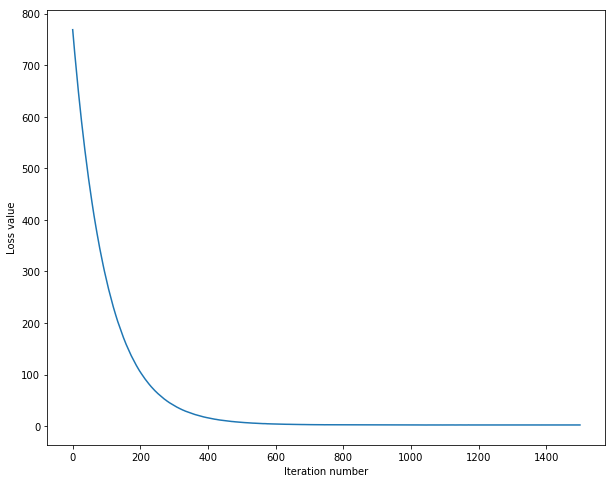

In [15]:
# A useful debugging strategy is to plot the loss as a function of
# iteration number:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

**Task 2.7 (1pt):** Write the `Softmax.predict` function and evaluate the performance on both the training and validation set.

In [16]:
#TODO: implement code in linear_classifier.py
y_train_pred = model.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = model.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

#hint, if everything is correct, the results should be in range 0.3 to 0.35

training accuracy: 0.331612
validation accuracy: 0.346000


**Task 2.8 (4pts):**

In [17]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges (orders of magnitude)
# for the learning rates and regularization strengths.
#
# YOUR TASK IS to get a classification accuracy of over 0.35 on the validation set.
from linear_classifier import Softmax
results = {}
best_val = -1
best_softmax = None

################################################################################
# TODO:                                                                        #
# Write code that chooses the best hyperparameters by tuning on the validation #
# set. For each combination of hyperparameters, train a linear model on the    #
# training set, compute its accuracy on the training and validation sets, and  #
# store these numbers in the results dictionary. In addition, store the best   #
# validation accuracy in best_val and the Softmax object that achieves this    #
# accuracy in best_softmax.                                                    #
# TODO: the best model must achieve at least 0.35 accuracy                     #
# TODO: if not all parameters you tried are visible in the final submitted     #
# version, you might add a comment about what else you tried earlier.          #
#                                                                              #
# Hint: You should use a small value for num_iters as you develop your hyper-  #
# parameter search code so that the models don't take much time to train; once #
# you are confident that your code works, you should rerun the code with a     #
# larger value for num_iters.                                                  #
# The same approach might be useful to first determine the coarse range of     #
# useful values for both parameters (should it be near 0.1 or 0.0001?) and then#
# perform a finer-grained search.                                              #
################################################################################
learning_rates = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]  #fill this with LR you want to try, good LRs are quite small
regularization_strengths = [2.5e0, 2.5e2, 2.5e3, 2.5e4, 2.5e5, 2.5e6]  #the regs you want to try should be bigger

for lr in learning_rates:
    for reg in regularization_strengths:
        model = Softmax()
        model.train(X_train, y_train, learning_rate=lr, reg=reg,
                      num_iters=1500, verbose=False)
        
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)
        
        acc_train = np.mean(y_train == y_train_pred)
        acc_val = np.mean(y_val == y_val_pred)
        
        results[(lr, reg)] = acc_train, acc_val
        
        if acc_val > best_val:
            best_val = acc_val
            best_softmax = model

################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

/Users/post_protein/ut/neural_networks/hw/practice2/softmax.py:105: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(activation)) / X.shape[0]
/Users/post_protein/ut/neural_networks/hw/practice2/softmax.py:116: RuntimeWarning: overflow encountered in double_scalars
  loss += reg * np.sum(W * W)
/Users/post_protein/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/post_protein/ut/neural_networks/hw/practice2/softmax.py:116: RuntimeWarning: overflow encountered in multiply
  loss += reg * np.sum(W * W)
/Users/post_protein/ut/neural_networks/hw/practice2/softmax.py:117: RuntimeWarning: overflow encountered in multiply
  dW += reg * 2 * W
/Users/post_protein/ut/neural_networks/hw/practice2/softmax.py:99: RuntimeWarning: overflow encountered in subtract
  stable_e_z = Z - np.max(Z, axis=1)[:, np.newaxis]
/Users/post_protein/ut/neural_ne

lr 1.000000e-08 reg 2.500000e+00 train accuracy: 0.144857 val accuracy: 0.129000
lr 1.000000e-08 reg 2.500000e+02 train accuracy: 0.164898 val accuracy: 0.170000
lr 1.000000e-08 reg 2.500000e+03 train accuracy: 0.156531 val accuracy: 0.151000
lr 1.000000e-08 reg 2.500000e+04 train accuracy: 0.172224 val accuracy: 0.170000
lr 1.000000e-08 reg 2.500000e+05 train accuracy: 0.264469 val accuracy: 0.277000
lr 1.000000e-08 reg 2.500000e+06 train accuracy: 0.243878 val accuracy: 0.260000
lr 1.000000e-07 reg 2.500000e+00 train accuracy: 0.249694 val accuracy: 0.247000
lr 1.000000e-07 reg 2.500000e+02 train accuracy: 0.243224 val accuracy: 0.261000
lr 1.000000e-07 reg 2.500000e+03 train accuracy: 0.293714 val accuracy: 0.328000
lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.327714 val accuracy: 0.341000
lr 1.000000e-07 reg 2.500000e+05 train accuracy: 0.266367 val accuracy: 0.274000
lr 1.000000e-07 reg 2.500000e+06 train accuracy: 0.232204 val accuracy: 0.216000
lr 1.000000e-06 reg 2.500000

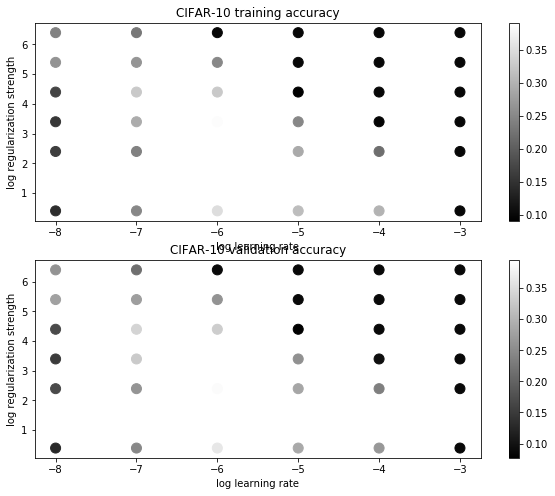

In [18]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

In [19]:
# evaluate on test set
# Evaluate the best softmax on test set
y_test_pred = best_softmax.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('softmax on raw pixels final test set accuracy: %f' % (test_accuracy, ))

softmax on raw pixels final test set accuracy: 0.387000


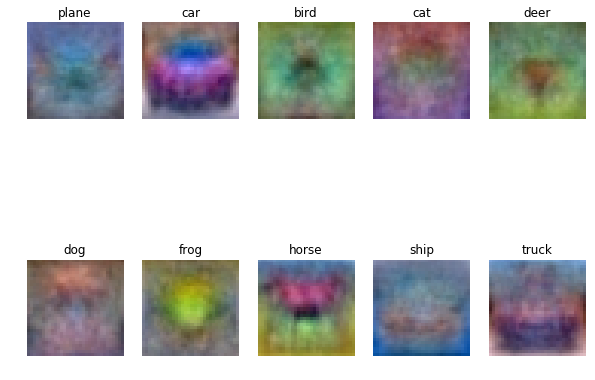

In [20]:
# Visualize the learned weights for each class
w = best_softmax.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])

**Task 2.9 (2pts):** Describe what your visualized weights look like, and offer a brief explanation for why they look the way that they do.

**Your answer:** As weights are updated in order for predictions to be closer to the true labels, the weights contain accumulated features of each category. Thus, the weights of "frog" category have a green area in the centre of visualization. Even more, the weights of "horse" class display something similar to a real horse image. Another example would be the weights of "ship" category, which saved the colors of sea and ocean. Similarly, the weights of "deer" class display mostly green and brown colors, which correspond to the natural habitat of deers. In general, the weights represent extracted features for each category.